In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
# Create data
sales = {
    '1 Week Ago': {'Apples': 80, 'Bananas': 30, 'Cucumbers': 90, 'Strawberries': 200},
    'Yesterday': {'Apples': 100, 'Bananas': 120, 'Cucumbers': 90}, 
    'Today': {'Apples': 40, 'Cucumbers': 80, 'Pineapples': 15}
}

In [3]:
def show_donuts(dct, key_order=None, n_col=None):
    if key_order is None:
        key_order = list(dct.keys())  # Random
    
    # Pick a color for each label
    all_labels = set([])
    for key, dct2 in dct.items():
        all_labels.update(list(dct2.keys()))
                
    colors_dict = {}
    palette = ['#ffb3ba', '#ffdfba', '#baffc9', '#bae1ff', '#E0BBE4']  
               # pink, orange, green, blue, purple
    for i, label in enumerate(sorted(all_labels)):
        colors_dict[label] = palette[i]
        
    # Layout
    if n_col is None:
        n_row = 1
        n_col = len(key_order)
    else:
        n_row = math.ceil(len(key_order) / n_col)
        
    plt.figure(figsize=(20, 20))

    for i in range(len(key_order)):
        key = key_order[i]
        values_dict = dct[key]
        
        labels = sorted(list(values_dict.keys()))
        values = [values_dict[label] for label in labels]
        colors = [colors_dict[label] for label in labels]

        # Draw
        plt.subplot(n_row, n_col, i+1)  # Indicate subplot location
        plt.title(key, fontsize=25)

        _, texts, autotexts = plt.pie(values, explode=[0.03]*len(labels), labels=labels, colors=colors, 
                                      autopct='%1.1f%%', pctdistance=0.85, startangle=90, counterclock=False)
        for i in range(len(texts)):
            texts[i].set_fontsize(17)  # For labels
            autotexts[i].set_fontsize(14)  # For values
            
        centre_circle = plt.Circle((0, 0), 0.7, fc='white')
        plt.gcf().gca().add_artist(centre_circle)  # gcf = get current figure, gca = get current axis

    plt.tight_layout()
    plt.show()

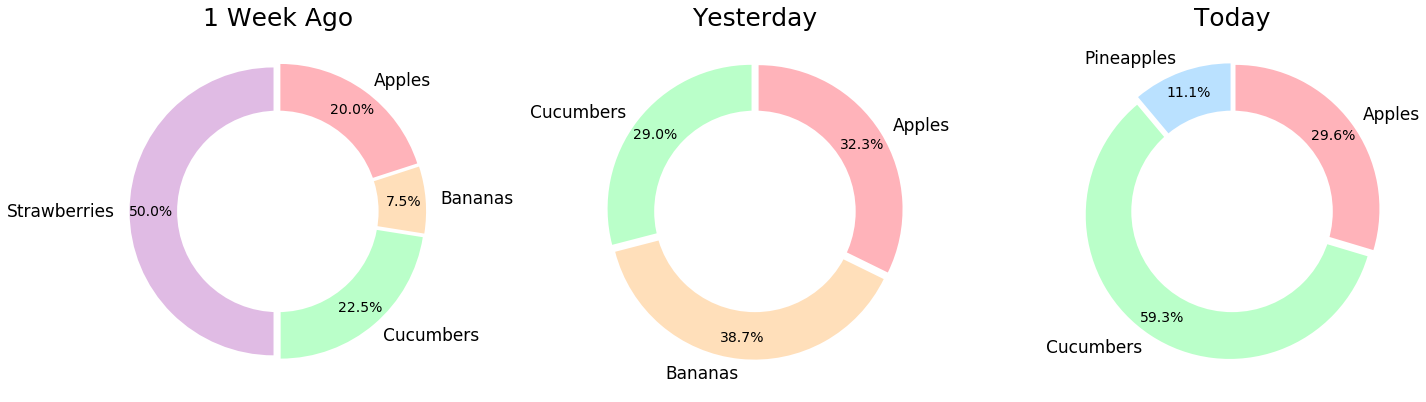

In [4]:
show_donuts(sales, key_order=['1 Week Ago', 'Yesterday', 'Today'])

# References
- https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html
- https://www.color-hex.com/color-palette/5361